<a href="https://colab.research.google.com/github/Peksyaji/Pokemon/blob/main/Analisis_Komponen_Utama_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Membaca data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/pokemon.xlsx')
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,height_m,hp,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,1,1,1,5,1,5,2,1,1,5,...,50,1.0,50,57,50,65,bug,6.0,5,0
1,2,1,1,5,1,5,4,4,1,25,...,95,5.0,60,69,95,36,bug,65.0,4,0
2,5,1,5,1,5,1,4,1,1,25,...,140,12.0,75,60,60,40,bug,1258.0,2,0
3,1,1,1,1,1,5,2,2,1,5,...,45,2.0,40,29,45,36,bug,34.0,4,0
4,1,1,1,1,1,5,2,2,1,5,...,90,6.0,50,35,35,15,bug,72.0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   against_bug       801 non-null    int64  
 1   against_dark      801 non-null    int64  
 2   against_dragon    801 non-null    int64  
 3   against_electric  801 non-null    int64  
 4   against_fairy     801 non-null    int64  
 5   against_fight     801 non-null    int64  
 6   against_fire      801 non-null    int64  
 7   against_flying    801 non-null    int64  
 8   against_ghost     801 non-null    int64  
 9   against_grass     801 non-null    int64  
 10  against_ground    801 non-null    int64  
 11  against_ice       801 non-null    int64  
 12  against_normal    801 non-null    int64  
 13  against_poison    801 non-null    int64  
 14  against_psychic   801 non-null    int64  
 15  against_rock      801 non-null    int64  
 16  against_steel     801 non-null    int64  
 1

In [ ]:
# Memilih 18 variabel against
df = df.iloc[:,:18]
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel
0,1,1,1,5,1,5,2,1,1,5,1,1,1,1,1,2,5
1,2,1,1,5,1,5,4,4,1,25,25,2,1,2,1,2,1
2,5,1,5,1,5,1,4,1,1,25,1,5,5,0,5,1,5
3,1,1,1,1,1,5,2,2,1,5,5,1,1,1,1,2,1
4,1,1,1,1,1,5,2,2,1,5,5,1,1,1,1,2,1


In [ ]:
df.isnull().sum()

against_bug         0
against_dark        0
against_dragon      0
against_electric    0
against_fairy       0
against_fight       0
against_fire        0
against_flying      0
against_ghost       0
against_grass       0
against_ground      0
against_ice         0
against_normal      0
against_poison      0
against_psychic     0
against_rock        0
against_steel       0
dtype: int64

In [ ]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,3.681648,1.857678,1.204744,1.981273,1.976280,3.509363,2.961298,2.119850,1.220974,5.098627,1.822722,2.660424,1.578027,2.421973,1.811486,2.087391,2.593009
std,5.313170,2.024159,0.954216,1.805796,2.082231,5.446350,3.747299,2.916439,1.043963,7.069937,2.466482,2.900352,2.415930,3.867391,2.586149,2.177694,2.974752
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,2.000000,1.000000,2.000000,2.000000,5.000000,5.000000,2.000000,1.000000,5.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,5.000000
max,25.000000,25.000000,5.000000,25.000000,25.000000,25.000000,25.000000,25.000000,5.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


**Standarisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standarisasi Data
standard_scaler = StandardScaler()
normalized_df = standard_scaler.fit_transform(df)

In [ ]:
# Normalisasi Data
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.505032,-0.423985,-0.214702,1.672732,-0.469155,0.273866,-0.256691,-0.384218,-0.2118,-0.013959,-0.333769,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,0.809646
1,-0.316703,-0.423985,-0.214702,1.672732,-0.469155,0.273866,0.277360,0.645076,-0.2118,2.816688,9.402769,-0.227847,-0.239406,-0.109179,-0.313977,-0.040155,-0.535844
2,0.248284,-0.423985,3.979842,-0.543742,1.453061,-0.461030,0.277360,-0.384218,-0.2118,2.816688,-0.333769,0.807156,1.417306,-0.626646,1.233690,-0.499643,0.809646
3,-0.505032,-0.423985,-0.214702,-0.543742,-0.469155,0.273866,-0.256691,-0.041120,-0.2118,-0.013959,1.288987,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,-0.535844
4,-0.505032,-0.423985,-0.214702,-0.543742,-0.469155,0.273866,-0.256691,-0.041120,-0.2118,-0.013959,1.288987,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,-0.535844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.316703,-0.423985,-0.214702,-0.543742,-0.469155,-0.461030,-0.523717,-0.041120,-0.2118,-0.580088,1.288987,-0.572848,-0.239406,-0.109179,-0.313977,-0.499643,0.809646
797,-0.505032,-0.423985,-0.214702,-1.097860,-0.469155,-0.461030,0.544386,-0.384218,-0.2118,-0.155491,-0.333769,-0.572848,-0.239406,0.667023,-0.313977,1.338309,0.809646
798,-0.505032,-0.423985,-0.214702,-1.097860,-0.469155,-0.461030,0.544386,-0.384218,-0.2118,-0.155491,-0.333769,-0.572848,-0.239406,0.667023,-0.313977,1.338309,0.809646
799,0.248284,-0.423985,-0.214702,1.118614,-0.469155,0.273866,0.544386,-0.384218,-0.2118,-0.580088,-0.739458,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,0.809646


In [ ]:
normalized_df.columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'lagainst_fire', 
                         'against_flying', 'against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison',
                         'against_psyshic','against_rock','against_steel']
normalized_df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,lagainst_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psyshic,against_rock,against_steel
0,-0.505032,-0.423985,-0.214702,1.672732,-0.469155,0.273866,-0.256691,-0.384218,-0.2118,-0.013959,-0.333769,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,0.809646
1,-0.316703,-0.423985,-0.214702,1.672732,-0.469155,0.273866,0.277360,0.645076,-0.2118,2.816688,9.402769,-0.227847,-0.239406,-0.109179,-0.313977,-0.040155,-0.535844
2,0.248284,-0.423985,3.979842,-0.543742,1.453061,-0.461030,0.277360,-0.384218,-0.2118,2.816688,-0.333769,0.807156,1.417306,-0.626646,1.233690,-0.499643,0.809646
3,-0.505032,-0.423985,-0.214702,-0.543742,-0.469155,0.273866,-0.256691,-0.041120,-0.2118,-0.013959,1.288987,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,-0.535844
4,-0.505032,-0.423985,-0.214702,-0.543742,-0.469155,0.273866,-0.256691,-0.041120,-0.2118,-0.013959,1.288987,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,-0.535844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.316703,-0.423985,-0.214702,-0.543742,-0.469155,-0.461030,-0.523717,-0.041120,-0.2118,-0.580088,1.288987,-0.572848,-0.239406,-0.109179,-0.313977,-0.499643,0.809646
797,-0.505032,-0.423985,-0.214702,-1.097860,-0.469155,-0.461030,0.544386,-0.384218,-0.2118,-0.155491,-0.333769,-0.572848,-0.239406,0.667023,-0.313977,1.338309,0.809646
798,-0.505032,-0.423985,-0.214702,-1.097860,-0.469155,-0.461030,0.544386,-0.384218,-0.2118,-0.155491,-0.333769,-0.572848,-0.239406,0.667023,-0.313977,1.338309,0.809646
799,0.248284,-0.423985,-0.214702,1.118614,-0.469155,0.273866,0.544386,-0.384218,-0.2118,-0.580088,-0.739458,-0.572848,-0.239406,-0.367912,-0.313977,-0.040155,0.809646


**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
pca.fit(normalized_df)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.components_

array([[ 1.59337747e-01, -5.93703719e-02,  4.78564990e-01,
         1.35214974e-03,  3.16064127e-01, -2.25362851e-02,
         8.82112033e-02,  4.10321882e-01, -1.19645129e-03,
         1.32079586e-01,  6.06669728e-02,  2.13955078e-01,
         4.02056068e-01, -3.59539980e-02,  2.89089138e-01,
         2.53010365e-01,  2.96780104e-01],
       [ 4.09528706e-01,  2.83159092e-01, -1.24003520e-02,
        -3.14027865e-01,  2.81434243e-01,  3.76825937e-01,
        -2.24014773e-01, -2.11022961e-01,  2.08109324e-01,
         2.97867789e-01, -2.12581727e-01, -1.30638840e-01,
        -1.24463069e-01,  1.34093592e-01,  1.09847060e-01,
         2.51548281e-01, -1.85246596e-01],
       [-1.35334959e-01,  4.02679081e-01,  7.14812589e-02,
        -2.99724411e-01, -2.27884195e-01, -3.07832684e-01,
        -1.25338169e-01,  1.14563194e-01,  3.17410595e-01,
        -5.44454064e-01, -1.68935193e-01, -6.94780949e-02,
         1.87887997e-01,  1.12583773e-01,  1.04156581e-01,
         2.32551005e-01, -7.4

In [ ]:
pca.explained_variance_ratio_

array([0.1812521 , 0.11015952, 0.10259518, 0.08827196, 0.08277731,
       0.07232039, 0.05787444, 0.04946248, 0.0460818 , 0.04432788,
       0.03960568, 0.03483164, 0.03002353, 0.02455954, 0.01839281,
       0.01086926, 0.00659448])

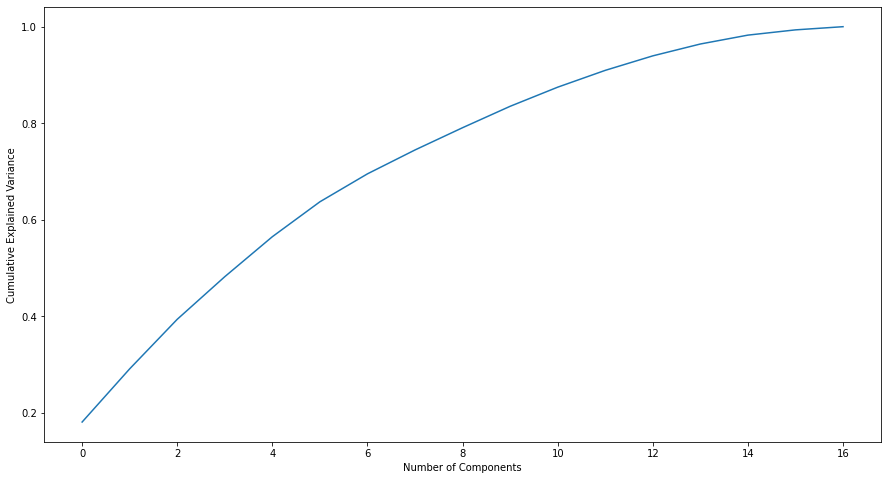

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Dari grafik di atas, dapat kita lihat bahwa komponen maksimal yang dapat kita ambil sebanyak 6 komponen dengan tingkat informasi mecapai >60%

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [ ]:
df_pca = pca_final.fit_transform(normalized_df)
df_pca.shape

(801, 6)

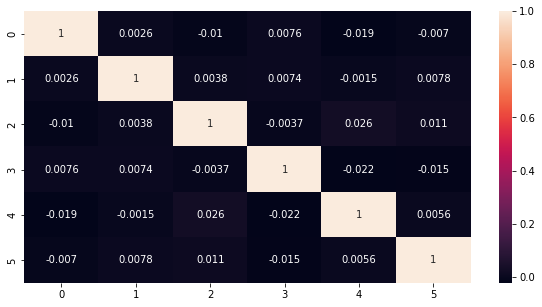

In [ ]:
corrmat = np.corrcoef(df_pca.transpose())
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [ ]:
# Mengonversi data hasil PCA mejadi DataFrame
df_pca = pd.DataFrame(df_pca)

In [ ]:
df_pca.head()

,0,1,2,3,4,5
0,-0.547237,-0.965122,0.647787,0.405112,0.442476,-0.962069
1,0.572965,-2.917725,3.705547,5.071781,1.507625,5.635476
2,3.871608,0.661980,1.505077,-0.602245,1.088718,-1.091864
3,-0.774079,-0.401812,0.438216,0.708872,-0.506883,0.510696
4,-0.774079,-0.401812,0.438216,0.708872,-0.506883,0.510696
